# Autokeras for Training Model for Predict Cat & Dog

In [1]:
# Importing basic Library
import os
import autokeras as ak
import numpy as np
from skimage.io import imread
from skimage.transform import resize

Loading Dataset two lable Cat(7000 img) and Dog(7000 img) images in this dataset

In [2]:
datadir = 'D:\\Images\\cats-vs-dogs\\PetImages'

In [3]:
labels = [] # Image Categories

for category in os.listdir(datadir):
    labels.append(category)
print(labels)

['Cat', 'Dog']


# Processing Image
function Preprocessing of images
Taking image size is 64X64

In [5]:
def preprocess(path):
    img_array = imread(path)
    img_resized = resize(img_array,(64,64,3))
    return img_resized

Processing Image

In [ ]:
target = []
images = []

for category in labels:
    path = os.path.join(datadir,category)
    class_num = labels.index(category)
    
    c = 0
#     for img in os.listdir(path)[:2950]:
    for img in os.listdir(path)[:7000]:
        try:
            img1 = preprocess(os.path.join(path,img))        
            images.append(img1)
            target.append(class_num)
            
            c = c + 1
            print(c)
        except Exception as e:
            print('Bad Image:', os.path.join(path,img))

In [30]:
print(len(target))
print(len(images))
# print(target)
# print(images)

13998
13998


Convert images in numpy array

In [31]:
target = np.array(target)
images = np.array(images)

In [32]:
print(labels)
print(images.shape)
type(target.shape)

['Cat', 'Dog']
(13998, 64, 64, 3)


tuple

# Spliting Image Dataset

In [33]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images,target,test_size=0.15, random_state=21)

In [34]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train[:10])

(11898, 64, 64, 3)
(11898,)
(2100, 64, 64, 3)
(2100,)
[0 0 1 0 1 0 0 1 1 1]


# Create Classifier for autokeras model training

Saving high accuracy model

In [38]:
from keras.callbacks import ModelCheckpoint
model_path = 'cat_dog_predict_model.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [39]:
clf = ak.ImageClassifier(overwrite=True,max_trials=1)

In [40]:
history = clf.fit(x_train, y_train, epochs=20,verbose=1,batch_size=32,callbacks=callbacks_list)

Trial 1 Complete [00h 16m 17s]
val_loss: 0.5503110289573669

Best val_loss So Far: 0.5503110289573669
Total elapsed time: 00h 16m 17s
INFO:tensorflow:Oracle triggered exit

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 1/20
372/372 [==============================] - 87s 233ms/step - loss: 0.6084 - accuracy: 0.6673
Epoch 2/20
372/372 [==============================] - 93s 250ms/step - loss: 0.5178 - accuracy: 0.7481
Epoch 3/20
372/372 [==============================] - 90s 241ms/step - loss: 0.4639 - accuracy: 0.7853
Epoch 4/20
372/372 [=======

# Predicting Test Images

In [43]:
ypred = clf.predict(x_test)

In [44]:
ypred[:40]

array([[1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

# Accuracy and Confussion Metrix And Classification Report


In [45]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [46]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.83      1090
           1       0.85      0.74      0.79      1010

    accuracy                           0.81      2100
   macro avg       0.81      0.81      0.81      2100
weighted avg       0.81      0.81      0.81      2100



In [48]:
print((accuracy_score(y_test,ypred)).round(2))

0.81


In [49]:
print(confusion_matrix(y_test,ypred))

[[953 137]
 [263 747]]


# Export Autokeras Model

In [50]:
# Export model____________
model = clf.export_model()
model.save("autokeras_cat_dog_predict_model.h5")

# PREDICTING RESULT BY CLASSIFIER

Loading Images

In [52]:
path = "D:\\Images\\cats-vs-dogs\\predict"

In [62]:
out = []

count = 0
for img in os.listdir(path)[20:60]:
    img = preprocess(os.path.join(path,img))        
    out.append(img)

    count = count + 1
    print(count,end=' ,')

out = np.array(out)
pred = clf.predict(out)

1 ,2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,10 ,11 ,12 ,13 ,14 ,15 ,16 ,17 ,18 ,19 ,20 ,21 ,22 ,23 ,24 ,25 ,26 ,27 ,28 ,29 ,30 ,31 ,32 ,33 ,34 ,35 ,36 ,37 ,38 ,39 ,40 ,

Result Predicted OUTPUT

In [63]:
pred

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

0
Predicted Image is *** CAT ***


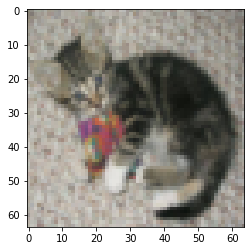



0
Predicted Image is *** CAT ***


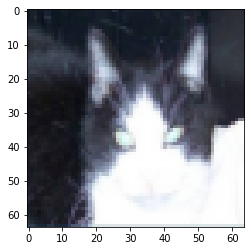



0
Predicted Image is *** CAT ***


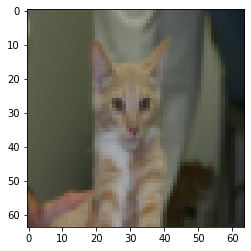



0
Predicted Image is *** CAT ***


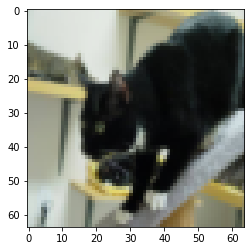



0
Predicted Image is *** CAT ***


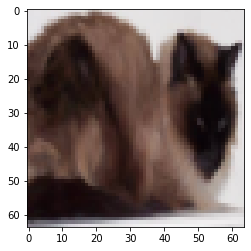



0
Predicted Image is *** CAT ***


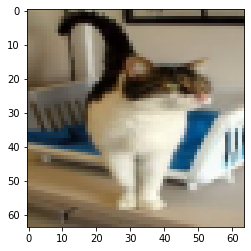



0
Predicted Image is *** CAT ***


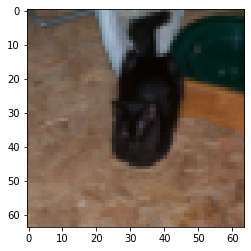



0
Predicted Image is *** CAT ***


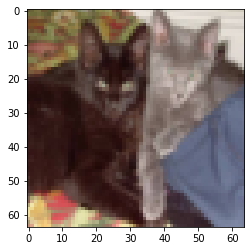



0
Predicted Image is *** CAT ***


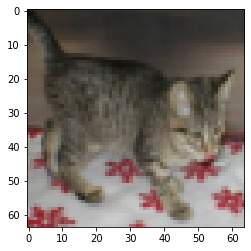



0
Predicted Image is *** CAT ***


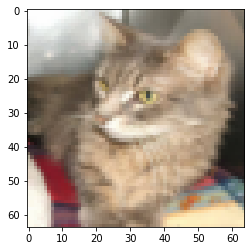



0
Predicted Image is *** CAT ***


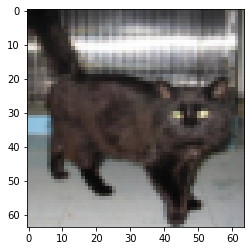



0
Predicted Image is *** CAT ***


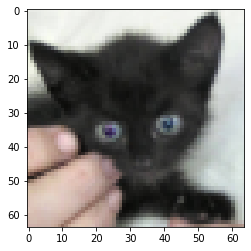



0
Predicted Image is *** CAT ***


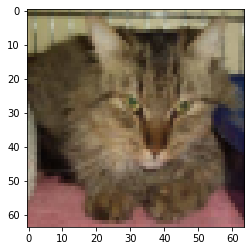



0
Predicted Image is *** CAT ***


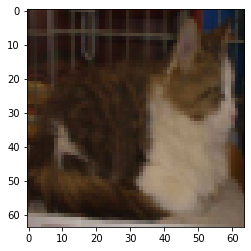



0
Predicted Image is *** CAT ***


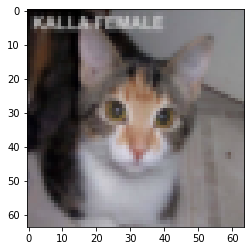



1
Predicted Image is *** DOG ***


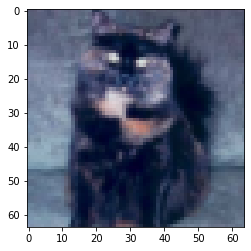



0
Predicted Image is *** CAT ***


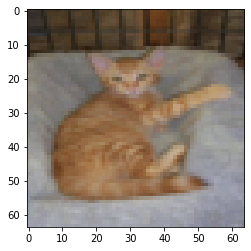



0
Predicted Image is *** CAT ***


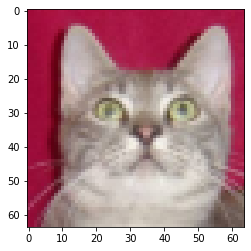



0
Predicted Image is *** CAT ***


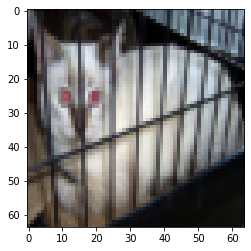



0
Predicted Image is *** CAT ***


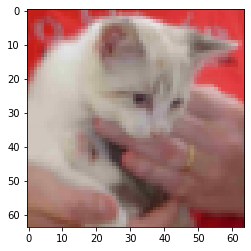



1
Predicted Image is *** DOG ***


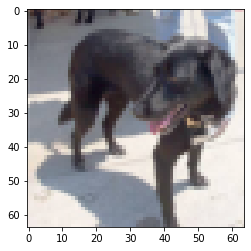



1
Predicted Image is *** DOG ***


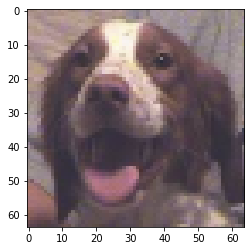



1
Predicted Image is *** DOG ***


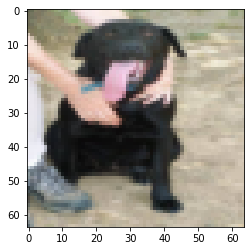



1
Predicted Image is *** DOG ***


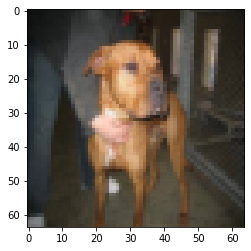



1
Predicted Image is *** DOG ***


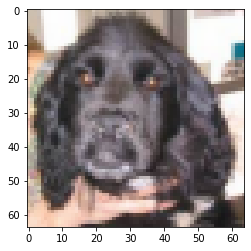



1
Predicted Image is *** DOG ***


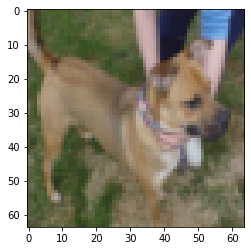



1
Predicted Image is *** DOG ***


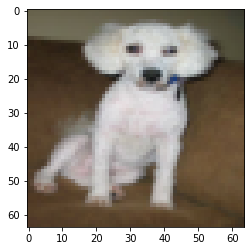



1
Predicted Image is *** DOG ***


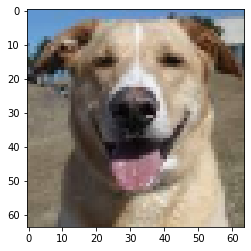



1
Predicted Image is *** DOG ***


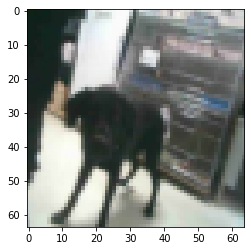



1
Predicted Image is *** DOG ***


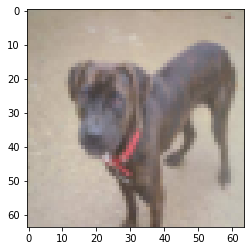



1
Predicted Image is *** DOG ***


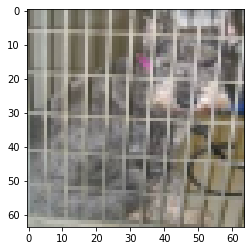



1
Predicted Image is *** DOG ***


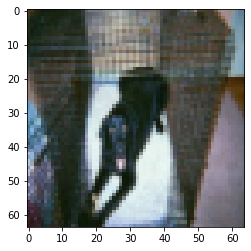



1
Predicted Image is *** DOG ***


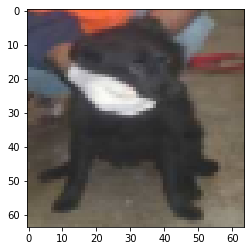



1
Predicted Image is *** DOG ***


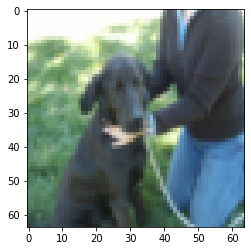



0
Predicted Image is *** CAT ***


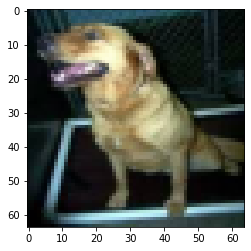



1
Predicted Image is *** DOG ***


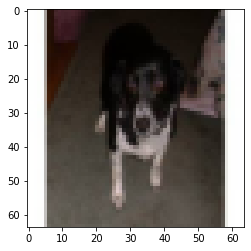



1
Predicted Image is *** DOG ***


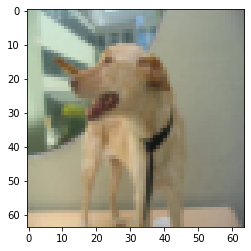



1
Predicted Image is *** DOG ***


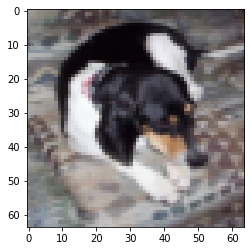



1
Predicted Image is *** DOG ***


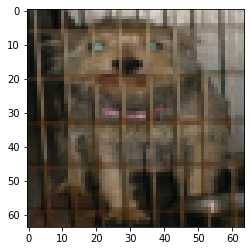



1
Predicted Image is *** DOG ***


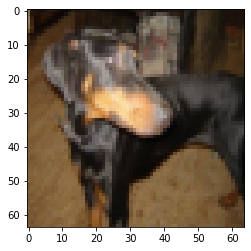

In [64]:
import matplotlib.pyplot as plt
for i in range(len(out)):
    t = out[i]
    t1 = int(pred[i][0])
    
    if t1 == 0:
        print(t1)
        print("Predicted Image is *** CAT ***")
        
        plt.imshow(t)
        plt.show()
        print()
        print()
        
    if t1 == 1:
        print(t1)
        print("Predicted Image is *** DOG ***")    
        plt.imshow(t)
        plt.show()
        print()
        print()